In [1]:
#import pip
#package = ['cython', 'numpy', 'scipy','pandas', 'sklearn','hmmlearn']
#for pack in package:
#    pip.main(['install', pack])
import sys
print (sys.version)

3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
from pymongo import MongoClient
import sys
sys.path.append('../../lib')
import rs_common_framework_v4 as rs
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go  #important library for the plotly
#import cufflinks as cf
import numpy as np
py.init_notebook_mode(connected=False) # run at the start of every ipython notebook to use plotly.offline
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
connection = MongoClient("localhost")
collection_metadata = connection["project_db"]["metadata"] 
collection_statistics = connection["project_db"]["statistics_daily"]

In [4]:
QUERY_TAG = "category:Blinds Height"
tags = rs.get_tag_names(collection_metadata, QUERY_TAG)
tags

['V099_blinds_height_N_o',
 'V102_blinds_height_N_i',
 'V105_blinds_height_O_o',
 'V108_blinds_height_O_i',
 'V111_blinds_height_S_o',
 'V114_blinds_height_S_i',
 'V117_blinds_height_W_o',
 'V120_blinds_height_W_i']

In [27]:
feature = 'std'
data = []
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tag = 'V108_blinds_height_O_i'
query_dict = {'tagname':tag}
projection = {feature:True}
df = rs.get_tag_values(collection_statistics,query_dict,projection,series_format='DF_t')
x_t = np.array(df[feature])    
xbin = dict(start=np.min(x_t)-10, size= 0.05, end= np.max(x_t)+10)

for weekday in week:
    query_dict = {'tagname':tag,'weekday_name':weekday}
    projection = {feature:True}
    if weekday == 'Saturday' or weekday == 'Sunday':
        query_dict.update({'day_type': 'weekend'})
    else:
        query_dict.update({'day_type': 'working_day'})
        
    df = rs.get_tag_values(collection_statistics,query_dict,projection,series_format='DF_t')
    df.dropna(inplace=True)
    x = list(df[feature].round(2))
    trace = go.Histogram(
        x= x,
        name=weekday,
        histnorm='probability',
        xbins=xbin,
        opacity=0.5
    )
    data.append(trace)
    
layout = go.Layout(
    title=tag,
    xaxis=dict(
        title='Value'
    ),
    yaxis=dict(
        title='probability'
    ),
    barmode='overlay',
    bargap=0.01
)


In [28]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

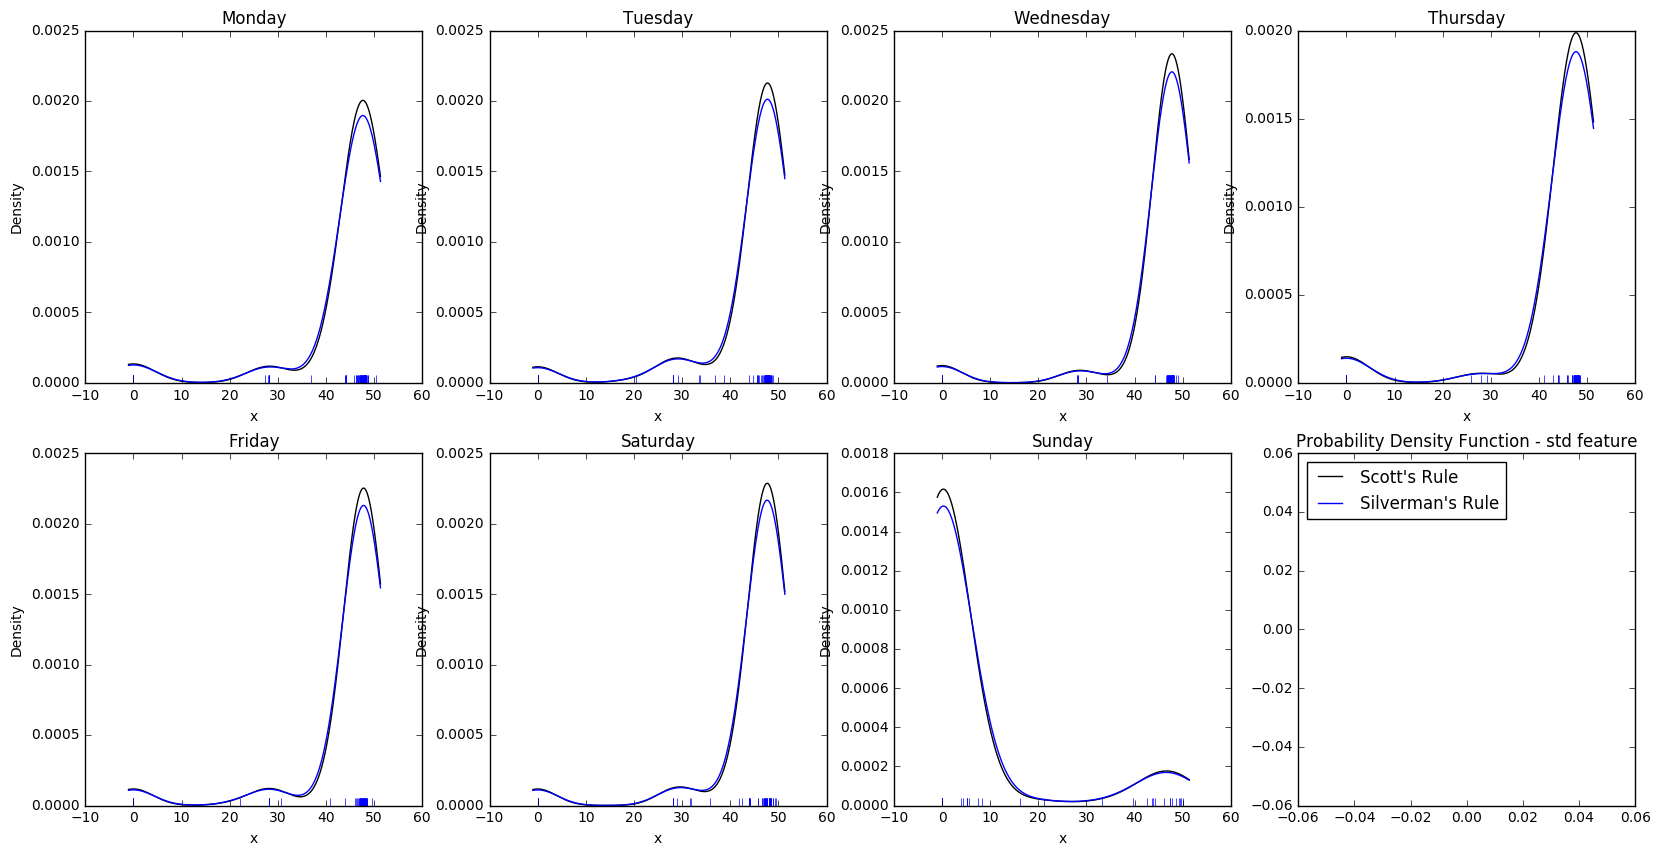

In [29]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure(figsize=(20, 10))
i = 1
for weekday in week:
    query_dict = {'tagname':tag,'weekday_name':weekday}
    projection = {feature:True}
    if weekday == 'Saturday' or weekday == 'Sunday':
        query_dict.update({'day_type': 'weekend'})
    else:
        query_dict.update({'day_type': 'working_day'})
        
    df = rs.get_tag_values(collection_statistics,query_dict,projection,series_format='DF_t')
    df.dropna(inplace=True)
    x1 = np.array(df[feature].round(2))
    xs = np.linspace(x_t.min()-1, x_t.max()+1, 2000)
    ds = xs[1] - xs[0]

    kde1 = stats.gaussian_kde(x1)
    kde2 = stats.gaussian_kde(x1, bw_method='silverman')
    kde3 = stats.norm.pdf(x1)
    
    ax1 = fig.add_subplot(2,4,i)
    ax1.set_xlabel('x')
    ax1.set_ylabel('Density')
    ax1.set_title(weekday)
    ax1.plot(x1, np.zeros(x1.shape), 'b+', ms=12)  # rug plot
    ax1.plot(xs, kde1(xs)*ds, 'k-', label="Scott's Rule")
    ax1.plot(xs, kde2(xs)*ds, 'b-', label="Silverman's Rule")
    #ax1.plot(xs, stats.norm.pdf(xs), 'r--', label="Normal PDF")
    
    i += 1
    
ax1 = fig.add_subplot(2,4,i)    
ax1.plot([], [], 'k-', label="Scott's Rule")
ax1.plot([], [], 'b-', label="Silverman's Rule")
ax1.set_title("Probability Density Function - " + feature + " feature") 
#ax1.plot([], [], 'r--', label="Normal PDF")
ax1.legend(loc=2)
plt.show()

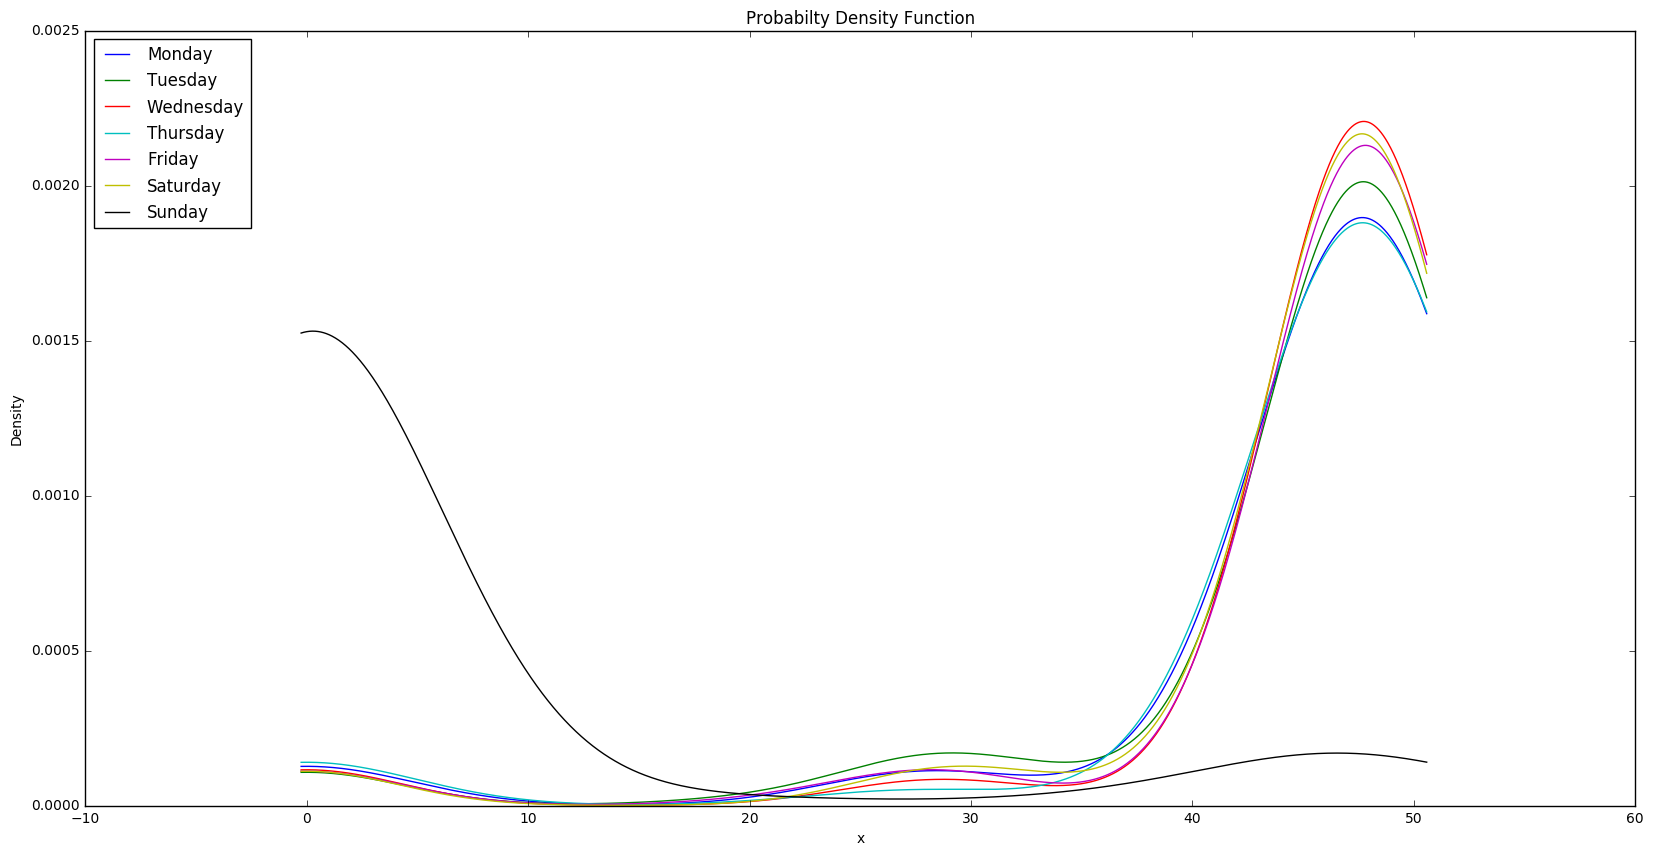

In [30]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title('Probabilty Density Function')
for weekday in week:
    query_dict = {'tagname':tag,'weekday_name':weekday}
    projection = {feature:True}
    if weekday == 'Saturday' or weekday == 'Sunday':
        query_dict.update({'day_type': 'weekend'})
    else:
        query_dict.update({'day_type': 'working_day'})
        
    df = rs.get_tag_values(collection_statistics,query_dict,projection,series_format='DF_t')
    df.dropna(inplace=True)
    x1 = np.array(df[feature].round(3))
    xs = np.linspace(x_t.min()-0.25, x_t.max()+0.25, 2000)

    kde1 = stats.gaussian_kde(x1)
    kde2 = stats.gaussian_kde(x1, bw_method='silverman')
    kde3 = stats.norm.pdf(x1)
    
    ax1.plot(xs, kde2(xs)*ds, label=weekday)
    #ax1.plot(x1, np.zeros(x1.shape), '+', ms=12)  # rug plot
    

#ax1.plot(xs, stats.norm.pdf(xs), 'r--', label="Normal PDF")    
ax1.legend(loc=2)
plt.show()

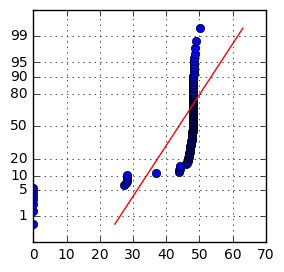

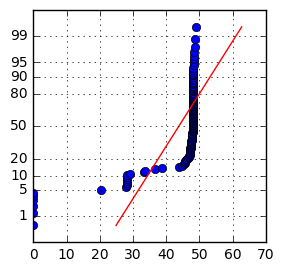

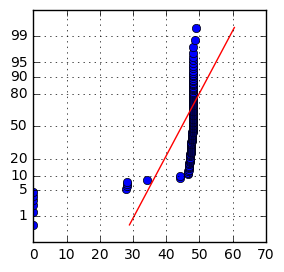

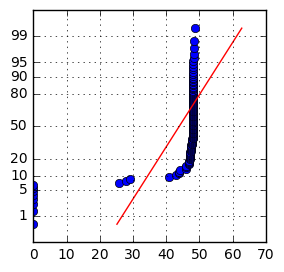

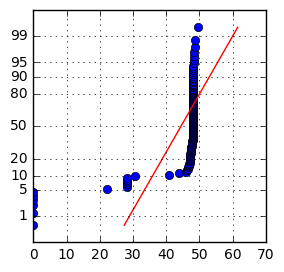

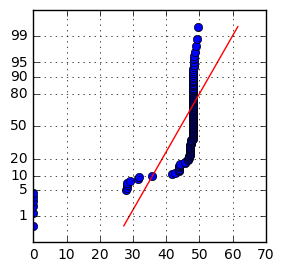

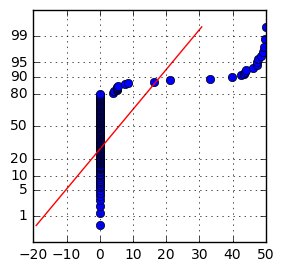

In [31]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure(figsize=(20, 10))
i = 1
for weekday in week:
    query_dict = {'tagname':tag,'weekday_name':weekday}
    projection = {feature:True}
    if weekday == 'Saturday' or weekday == 'Sunday':
        query_dict.update({'day_type': 'weekend'})
    else:
        query_dict.update({'day_type': 'working_day'})
        
    df = rs.get_tag_values(collection_statistics,query_dict,projection,series_format='DF_t')
    df.dropna(inplace=True)
    x = np.array(df[feature].round(2))
    # Calculate quantiles and least-square-fit curve
    (quantiles, values), (slope, intercept, r) = stats.probplot(x, dist='norm')

    #plot results
    plt.figure(figsize=(3, 3))
    plt.plot(values, quantiles,'ob')
    plt.plot(quantiles * slope + intercept, quantiles, 'r')

    #define ticks
    ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]

    #transfrom them from precentile to cumulative density
    ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]

    #assign new ticks
    plt.yticks(ticks_quan,ticks_perc)

    #show plot
    plt.grid()
    plt.show()